https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html

In [2]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=aa3fa7d8a29c44373a45777935287e6df67eb9b91ed845551e6eea9c80af7388
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Observed lighting value: 99
Light intensity: 81.10183403873286
Recommended light intensity: strong


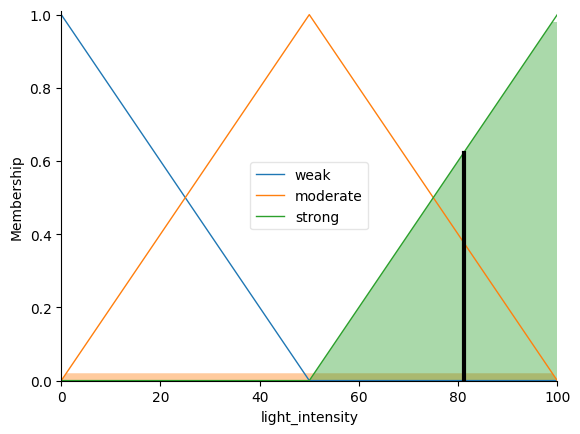

In [3]:
# Fuzzy inference
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Input variables
lighting = ctrl.Antecedent(np.arange(0, 101, 1), 'lighting')
# Output
light_intensity = ctrl.Consequent(np.arange(0, 101, 1), 'light_intensity')

# Define membership functions
lighting['dark'] = fuzz.trimf(lighting.universe, [0, 0, 50])
lighting['moderate'] = fuzz.trimf(lighting.universe, [0, 50, 100])
lighting['bright'] = fuzz.trimf(lighting.universe, [50, 100, 100])

light_intensity['weak'] = fuzz.trimf(light_intensity.universe, [0, 0, 50])
light_intensity['moderate'] = fuzz.trimf(light_intensity.universe, [0, 50, 100])
light_intensity['strong'] = fuzz.trimf(light_intensity.universe, [50, 100, 100])

# Set rules
rule1 = ctrl.Rule(lighting['dark'], light_intensity['weak'])
rule2 = ctrl.Rule(lighting['moderate'], light_intensity['moderate'])
rule3 = ctrl.Rule(lighting['bright'], light_intensity['strong'])

# Create control system and simulation
light_control_system = ctrl.ControlSystem([rule1, rule2, rule3])
light_simulation = ctrl.ControlSystemSimulation(light_control_system)

#######
light_value = 99
light_simulation.input['lighting'] = light_value
light_simulation.compute()

light_intensity_membership = {}
for label in light_intensity.terms:
  membership = fuzz.interp_membership(
      light_intensity.universe, light_intensity[label].mf,
      light_simulation.output['light_intensity'])
  light_intensity_membership[label] = membership

best_light_intensity = max(
    light_intensity_membership, key=light_intensity_membership.get)

print("Observed lighting value:", light_value)
print("Light intensity:", light_simulation.output['light_intensity'])
print("Recommended light intensity:", best_light_intensity)

light_intensity.view(sim=light_simulation)
